In [1]:
dataset = read.csv('Position_Salaries.csv')

In [3]:
dataset = dataset[2:3]
dataset

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


In [4]:
#Fitting linear regression to the data set
lin_reg = lm(Salary ~ ., data = dataset)


In [5]:
summary(lin_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-170818 -129720  -40379   65856  386545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -195333     124790  -1.565  0.15615   
Level          80879      20112   4.021  0.00383 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 182700 on 8 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6277 
F-statistic: 16.17 on 1 and 8 DF,  p-value: 0.003833


In [6]:
#Fiting polynomial regression to the dataset
dataset$Level2 = dataset$Level^2
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4
dataset

Level,Salary,Level2,Level3,Level4
1,45000,1,1,1
2,50000,4,8,16
3,60000,9,27,81
4,80000,16,64,256
5,110000,25,125,625
6,150000,36,216,1296
7,200000,49,343,2401
8,300000,64,512,4096
9,500000,81,729,6561
10,1000000,100,1000,10000


In [7]:
poly_reg = lm(Salary ~ . , data = dataset)

In [8]:
summary(poly_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
     1      2      3      4      5      6      7      8      9     10 
 -8357  18240   1358 -14633 -11725   6725  15997  10006 -28695  11084 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  184166.7    67768.0   2.718  0.04189 * 
Level       -211002.3    76382.2  -2.762  0.03972 * 
Level2        94765.4    26454.2   3.582  0.01584 * 
Level3       -15463.3     3535.0  -4.374  0.00719 **
Level4          890.2      159.8   5.570  0.00257 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20510 on 5 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9953 
F-statistic: 478.1 on 4 and 5 DF,  p-value: 1.213e-06


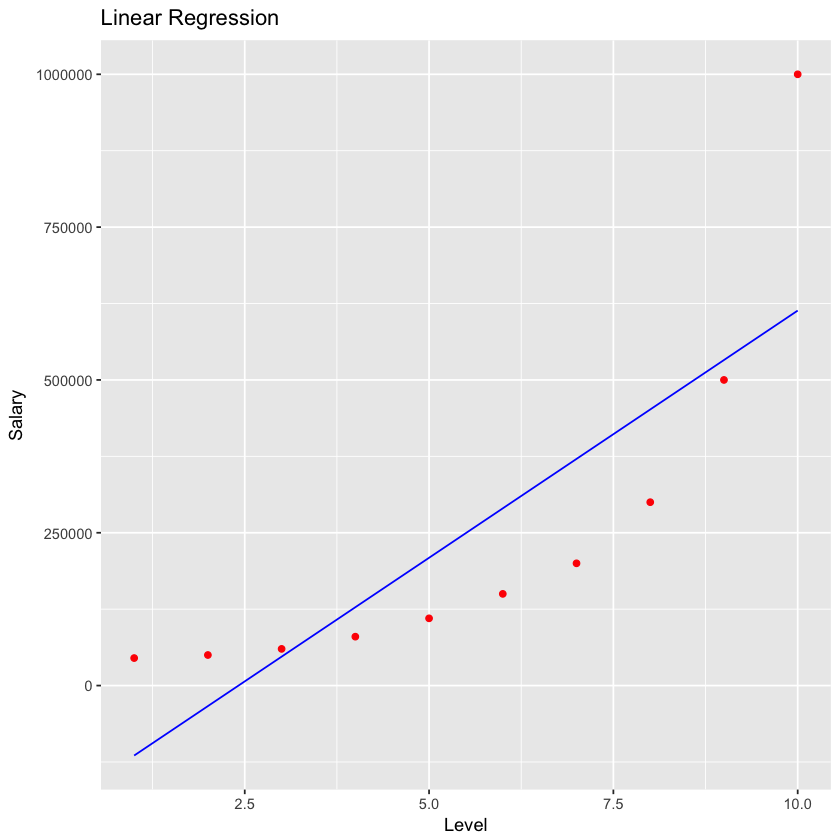

In [14]:
#Visualizing the linear regression result
library(ggplot2)
ggplot() + geom_point(aes(x=dataset$Level, y = dataset$Salary), col = 'red') + 
geom_line(aes(x=dataset$Level, y = predict(lin_reg, newdata = dataset)), color = 'blue') + 
ggtitle('Linear Regression') + xlab('Level') + ylab('Salary')


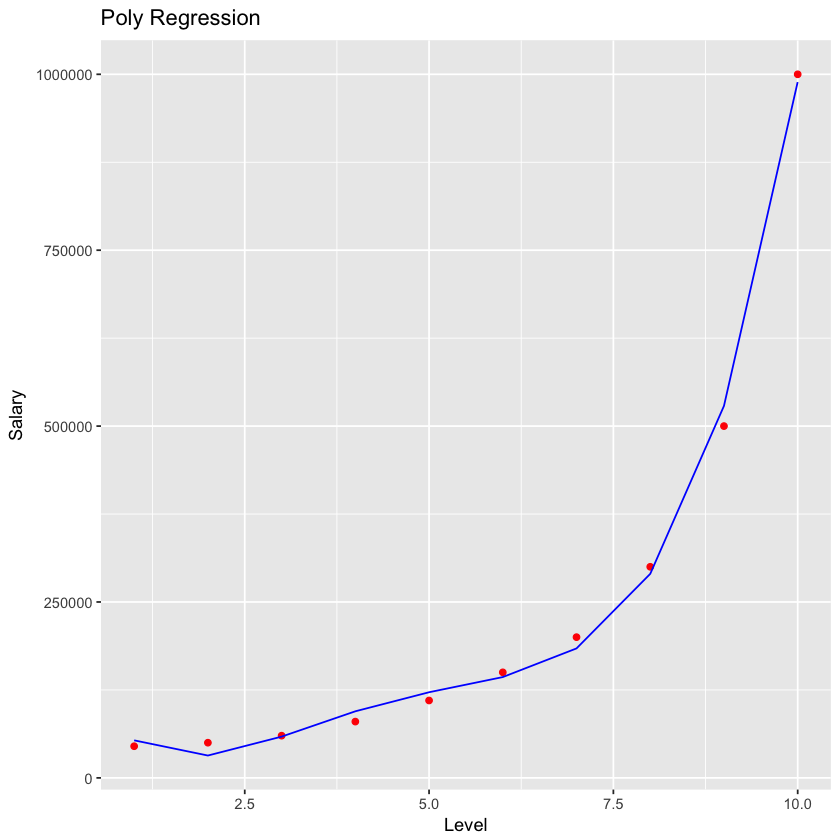

In [16]:
#Visualizing the poly regression result
library(ggplot2)
ggplot() + geom_point(aes(x=dataset$Level, y = dataset$Salary), col = 'red') + 
geom_line(aes(x=dataset$Level, y = predict(poly_reg, newdata = dataset)), color = 'blue') + 
ggtitle('Poly Regression') + xlab('Level') + ylab('Salary')



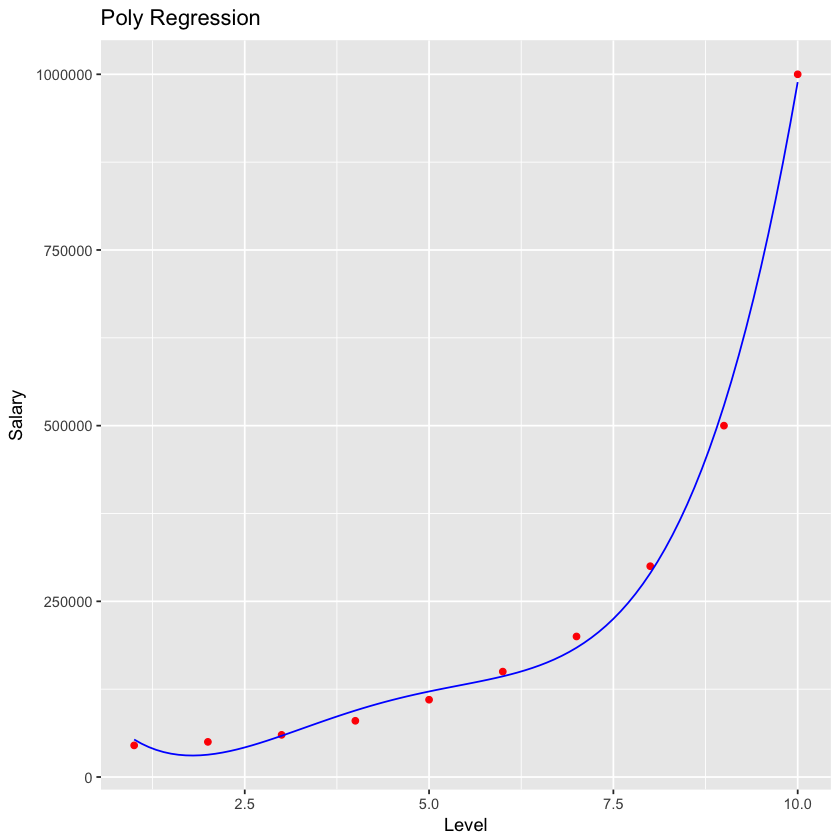

In [20]:
#Visualizing the regression model with higher resolution and smoother curve

x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)

newdataframe = data.frame(Level = x_grid, Level2 = x_grid^2, Level3 = x_grid^3, Level4 = x_grid^4)
ggplot() + geom_point(aes(x=dataset$Level, y = dataset$Salary), col = 'red') + 
geom_line(aes(x= x_grid, y = predict(poly_reg, newdata = newdataframe)), color = 'blue') + 
ggtitle('Poly Regression') + xlab('Level') + ylab('Salary')





In [21]:
#Predict a new result with Linear Regression
predict(lin_reg, data.frame(Level = 6.5))


1 
330378.8

In [23]:
#Predict a new result with poly regression
newdataframe = data.frame(Level = 6.5, Level2 = 6.5^2, Level3 = 6.5^3, Level4 = 6.5^4)
predict(poly_reg, newdataframe)


1 
158862.5